 This assignment aims to analyse BeeGeez’s sales dataset to gain insights into various products, 
regions and sales channels. The analysis will be conducted by leveraging Python programming in 
Google Colab notebooks, exploring SQLite databases, data visualisation, and applying industry best 
practices in programming

Analyse the BeeGeez’s Sales dataset using Python in Google Colab notebooks to understand SQLite 
databases, data exploration, data visualization, and applying industry best practices in programming.

Set up the environment:

*   Create a new Google Colab notebook.
*   Connect the notebook to your GitHub account.
*   Import the necessary libraries (SQLite3, Pandas, Matplotlib, and ipywidgets).

Access the database:

*   Connect to the BeeGeez Sales Data SQLite database using the SQLite3 library.
*   Examine the schema of the database and understand the structure of the tables.


Data extraction and manipulation:


*   Write SQL queries to extract relevant information from the tables 
*   Use Pandas to load the query results into data frames and perform data manipulation tasks 
such as filtering, grouping, and aggregation.
*   Clean and pre-process the data, addressing any missing or inconsistent values.

Interpretation and conclusion:

*   Summarise the main insights you have gained from the data analysis.
*   Discuss any limitations of your analysis and suggest possible improvements.
*   Reflect on the usability and effectiveness of Python notebooks

**Total revenue and profit generated by Product**
Analyse the total revenue and profit generated by each item type and then visualise the results sorted 
in descending order.
**Total revenue and profit generated by Region**
Analyse the total revenue and profit generated by region and then visualise the results in sorted order
**Identifying Top Revenue-Generating Products by Item Type and Sales Channel**
Analyse the sales data based on item type and sales channel to identify the products that generate 
the highest revenue both online and offline. Visualise the results using horizontal bars in either 
ascending or descending order

**STEPS**

1. create environment
2. access database
3. SQL
4. pandas
5. clean data, check missing
6. filter/group
7. visualize
8. discussion and analysis
9. reflection




In [7]:
import sqlite3 #start by loading in the library

In [14]:
conn = sqlite3.connect('beegeez_sales_data.db') #use the connect method and pass the name of the database.

In [15]:
cur = conn.cursor() #create a cursor object

In [16]:
sql='''
SELECT name FROM sqlite_master WHERE type='table';
'''
cur.execute(sql)
cur.fetchall()
#use fetchall() function to return all the results.

[('sales',)]

In [56]:
import pandas as pd # use pandas package to read SQLite database

sql='''
SELECT * from sales;
'''
# Load the data into a DataFrame
df = pd.read_sql_query(sql, conn)
df

,Region,Country,Item_Type,Sales_Channel,Order_Priority,Order_Date,Order_ID,Ship_Date,Units_Sold,Unit_Price,Unit_Cost,Total_Revenue,Total_Cost,Total_Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,2011-07-26,512878119,2011-09-03,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,2011-11-11,810711038,2011-12-28,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,2016-06-01,728815257,2016-06-29,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,2015-07-30,559427106,2015-08-08,5767,81.73,56.67,471336.91,326815.89,144521.02


In [65]:
subset_df = df[['Region', 'Item_Type','Sales_Channel','Total_Revenue','Total_Profit']]
subset_df #create subset to minimize columns

,Region,Item_Type,Sales_Channel,Total_Revenue,Total_Profit
0,Australia and Oceania,Baby Food,Offline,2533654.00,951410.50
1,Central America and the Caribbean,Cereal,Online,576782.80,248406.36
2,Europe,Office Supplies,Offline,1158502.59,224598.75
3,Sub-Saharan Africa,Fruits,Online,75591.66,19525.82
4,Sub-Saharan Africa,Office Supplies,Offline,3296425.02,639077.50
...,...,...,...,...,...
95,Sub-Saharan Africa,Clothes,Online,97040.64,65214.72
96,Asia,Fruits,Offline,58471.11,15103.47
97,Sub-Saharan Africa,Vegetables,Offline,228779.10,93748.05
98,North America,Personal Care,Offline,471336.91,144521.02


In [38]:
df.isnull().sum() #check if with missing values in each column

Region            0
Country           0
Item_Type         0
Sales_Channel     0
Order_Priority    0
Order_Date        0
Order_ID          0
Ship_Date         0
Units_Sold        0
Unit_Price        0
Unit_Cost         0
Total_Revenue     0
Total_Cost        0
Total_Profit      0
dtype: int64

In [39]:
df_Region = subset_df.groupby("Region").size()
print(df_Region) #extract region for checking

Region
Asia                                 11
Australia and Oceania                11
Central America and the Caribbean     7
Europe                               22
Middle East and North Africa         10
North America                         3
Sub-Saharan Africa                   36
dtype: int64


In [40]:
df_Item_Type = subset_df.groupby("Item_Type").size()
print(df_Item_Type) #extract item type for checking

Item_Type
Baby Food           7
Beverages           8
Cereal              7
Clothes            13
Cosmetics          13
Fruits             10
Household           9
Meat                2
Office Supplies    12
Personal Care      10
Snacks              3
Vegetables          6
dtype: int64


In [47]:
grouped = df.groupby(['Item_Type']).agg({'Total_Revenue': 'sum', 'Total_Profit': 'sum'})
print(grouped) # group the data by item type, and calculate total revenue and total profit for each type

                 Total_Revenue  Total_Profit
Item_Type                                   
Baby Food          10350327.60    3886643.70
Beverages           2690794.60     888047.28
Cereal              5322898.90    2292443.43
Clothes             7787292.80    5233334.40
Cosmetics          36601509.60   14556048.66
Fruits               466481.34     120495.18
Household          29889712.29    7412605.71
Meat                4503675.75     610610.00
Office Supplies    30585380.07    5929583.75
Personal Care       3980904.84    1220622.48
Snacks              2080733.46     751944.18
Vegetables          3089057.06    1265819.63


In [61]:
grouped = df.groupby("Item_Type")["Total_Revenue"].sum().sort_values(ascending=False)
grouped # Get total revenue per item type and sort in descending order - highest to lowest

Item_Type
Cosmetics          36601509.60
Office Supplies    30585380.07
Household          29889712.29
Baby Food          10350327.60
Clothes             7787292.80
Cereal              5322898.90
Meat                4503675.75
Personal Care       3980904.84
Vegetables          3089057.06
Beverages           2690794.60
Snacks              2080733.46
Fruits               466481.34
Name: Total_Revenue, dtype: float64

In [59]:
grouped = df.groupby("Item_Type")["Total_Profit"].sum().sort_values(ascending=False)
grouped # Get total profit per item type and sort in descending order - highest to lowest

Item_Type
Cosmetics          14556048.66
Household           7412605.71
Office Supplies     5929583.75
Clothes             5233334.40
Baby Food           3886643.70
Cereal              2292443.43
Vegetables          1265819.63
Personal Care       1220622.48
Beverages            888047.28
Snacks               751944.18
Meat                 610610.00
Fruits               120495.18
Name: Total_Profit, dtype: float64

In [62]:
grouped = df.groupby("Region")["Total_Revenue"].sum().sort_values(ascending=False)
grouped # Get total revenue per region and sort in descending order - highest to lowest

Region
Sub-Saharan Africa                   39672031.43
Europe                               33368932.11
Asia                                 21347091.02
Australia and Oceania                14094265.13
Middle East and North Africa         14052706.58
Central America and the Caribbean     9170385.49
North America                         5643356.55
Name: Total_Revenue, dtype: float64

In [63]:
grouped = df.groupby("Region")["Total_Profit"].sum().sort_values(ascending=False)
grouped # Get total profit per region and sort in descending order - highest to lowest

Region
Sub-Saharan Africa                   12183211.40
Europe                               11082938.63
Asia                                  6113845.87
Middle East and North Africa          5761191.86
Australia and Oceania                 4722160.03
Central America and the Caribbean     2846907.85
North America                         1457942.76
Name: Total_Profit, dtype: float64

In [66]:
value = "Online"
subset_df.loc[subset_df["Sales_Channel"] == value] # extract data with online sales channel only

,Region,Item_Type,Sales_Channel,Total_Revenue,Total_Profit
1,Central America and the Caribbean,Cereal,Online,576782.80,248406.36
3,Sub-Saharan Africa,Fruits,Online,75591.66,19525.82
5,Australia and Oceania,Baby Food,Online,759202.72,285087.64
7,Sub-Saharan Africa,Vegetables,Online,1245112.92,510216.66
9,Sub-Saharan Africa,Cereal,Online,1356180.10,584073.87
10,Asia,Vegetables,Online,19103.44,7828.12
12,Asia,Clothes,Online,902980.64,606834.72
15,Europe,Clothes,Online,182825.44,122865.12
19,Australia and Oceania,Meat,Online,2492526.12,337937.60
20,Europe,Baby Food,Online,1901836.00,714157.00


In [67]:
value = "Offline"
subset_df.loc[subset_df["Sales_Channel"] == value] # extract data with offline sales channel only

,Region,Item_Type,Sales_Channel,Total_Revenue,Total_Profit
0,Australia and Oceania,Baby Food,Offline,2533654.00,951410.50
2,Europe,Office Supplies,Offline,1158502.59,224598.75
4,Sub-Saharan Africa,Office Supplies,Offline,3296425.02,639077.50
6,Sub-Saharan Africa,Household,Offline,2798046.49,693911.51
8,Sub-Saharan Africa,Personal Care,Offline,496101.10,152114.20
11,Sub-Saharan Africa,Clothes,Offline,455479.04,306097.92
13,Central America and the Caribbean,Household,Offline,5997054.98,1487261.02
14,Asia,Personal Care,Offline,400558.73,122819.06
16,Asia,Cosmetics,Offline,3039414.40,1208744.24
17,Sub-Saharan Africa,Beverages,Offline,257653.50,85033.80


In [74]:
import pandas as pd
import matplotlib.pyplot as plt # import matplotlib library for plotting in graph
Online_Revenue = subset_df[(subset_df["Sales_Channel"] == "Online")] # filter dataframe to include Online sales channel only
Offline_Revenue = subset_df[(subset_df["Sales_Channel"] == "Offline")] # filter dataframe to include Offline sales channel only


In [78]:
grouped_Online = Online_Revenue.groupby("Item_Type")["Total_Revenue"].sum().sort_values(ascending=False)
grouped_Online # Get total revenue per item type in online group and sort in descending order - highest to lowest

Item_Type
Cosmetics          18348846.80
Office Supplies    17040863.28
Cereal              4549261.20
Meat                4503675.75
Baby Food           4198590.16
Clothes             3320909.92
Vegetables          2285326.04
Snacks              2080733.46
Beverages            717444.00
Personal Care        683099.34
Fruits               336757.02
Household            188452.14
Name: Total_Revenue, dtype: float64

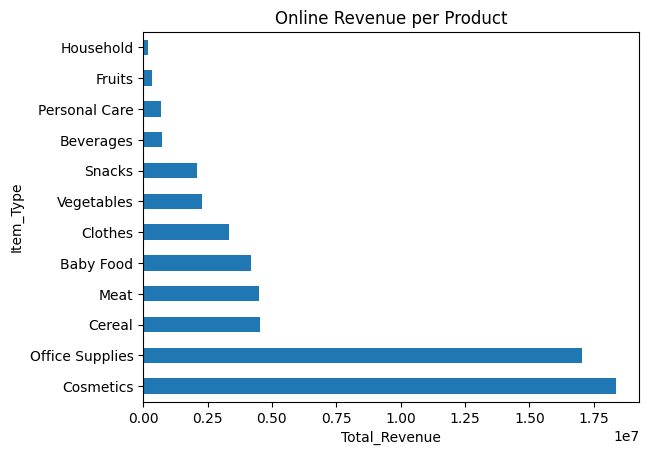

In [79]:
ax = grouped_Online.plot(kind="barh")
ax.set_xlabel("Total_Revenue")
ax.set_ylabel("Item_Type")
ax.set_title("Online Revenue per Product")
plt.show() #plot and create horizontal bar graph to present online revenue per product

In [80]:
grouped_Offline = Offline_Revenue.groupby("Item_Type")["Total_Revenue"].sum().sort_values(ascending=False)
grouped_Offline # Get total revenue per item type in offline group and sort in descending order - highest to lowest

Item_Type
Household          29701260.15
Cosmetics          18252662.80
Office Supplies    13544516.79
Baby Food           6151737.44
Clothes             4466382.88
Personal Care       3297805.50
Beverages           1973350.60
Vegetables           803731.02
Cereal               773637.70
Fruits               129724.32
Name: Total_Revenue, dtype: float64

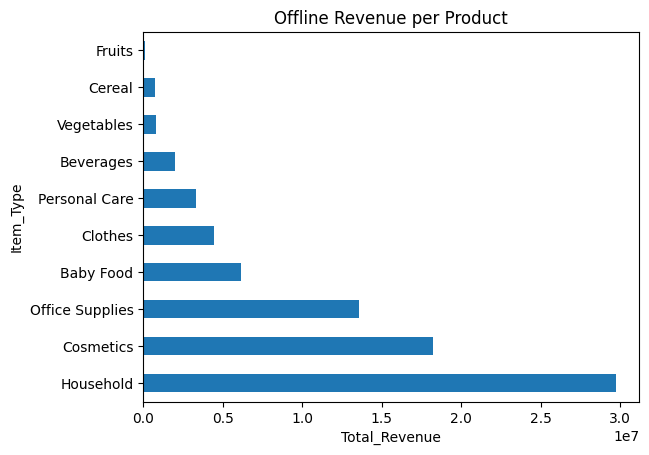

In [81]:
ax = grouped_Offline.plot(kind="barh")
ax.set_xlabel("Total_Revenue")
ax.set_ylabel("Item_Type")
ax.set_title("Offline Revenue per Product")
plt.show() #plot and create horizontal bar graph to present offline revenue per product